<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[colab](https://colab.research.google.com/drive/163C85NuF09HQWujN3IP22zahZhSsYLNI)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np
from collections import namedtuple
from scipy.stats import norm
plt.style.use('fivethirtyeight')

||replacements|w/o replacements|
|-|:-:|:-:|
|**Combinations**<br>(order does not matter)|$$\binom{k+n-1}{k}=\frac{(k+n-1)!}{k!(n-1)!}$$|$$\binom{n}{k}=\frac{n!}{k!(n-k)!}$$|
|**Permutations**<br>(order matters)|$$n^k$$|$$\frac{n!}{(n-k)!}$$|

||pars|&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PMF/PDF &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|mean|var|med|comments|
|-|:-:|:-:|:-:|:-:|:-:|:-:|
|**Bernoulli**|$$p$$|$$\begin{cases} P(X=0)=q=(1-p) \\ P(X=1)=p \end{cases}$$|$$p$$|$$p  (1-p)$$||boolean-valued outcome|
|**Grometric**|$$p$$|$$P(X=k)=(1-p)^{k-1}p$$|$$\frac{1}{p}$$|$$\frac{1-p}{p^2}$$||# of first success|
|**Binomial**|$$n, p$$|$$P(X=k)=\binom{n}{k}p^k(1-p)^{n-k}$$|$$np$$|$$np(1-p)$$||# successes drawn with replacement|
|**Poisson**|$$\lambda$$|$$P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}$$|$$\lambda$$|$$\lambda$$|| # emails/calls per time period|
|**Exponential**|$$\lambda$$|$$f(x \mid \lambda)=\lambda e^{-\lambda x}$$|$$\frac{1}{\lambda}$$|$$\frac{1}{\lambda^2}$$|$$\frac{\ln{2}}{\lambda}$$|time between events|
|**Normal**|$$\mu, \sigma^2$$|$$f(x \mid \mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$|$$\mu$$|$$\sigma^2$$|$$\mu$$|measurement errors


||||comments|
|-:|:-:|:-:|:-:|
|**Law or Large Numbers**|$$\bar{X}_n \xrightarrow{\text{a.s.}} \mu$$||converges strongly<br>**almost surely**<br>**almost everywhere**<br>**with probability 1**|
|**Central Limit Theorem**|$$\bar{X}_n \xrightarrow{\text{d}} N\Bigl(\mu, \frac{\sigma^2}{n}\Bigr)$$|$$\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma} \xrightarrow{\text{d}} N(0,1)$$|converges weakly<br>**in distribution**|

||$$\textbf{Pred NO}$$<br>$$\text{TN}+\text{FN}$$<br>$$P(\bar{B})$$|$$\textbf{Pred YES}$$<br>$$\text{FP}+\text{TP}$$<br>$$\text{Evidence}=P(B)$$|$$\text{ROC(th)}=\frac{\text{TPR(th)}}{\text{FPR(th)}}$$|
|:-:|:-:|:-:|:-:|
|$$\textbf{Actual NO}$$<BR>$$\text{TN}+\text{FP}$$<BR>$$P(\bar{A})$$|$$\textbf{TN}$$<br>$$\text{Confidence}$$<BR>$$c=1-\alpha$$|$$\textbf{FP}$$<br>$$\text{Type I}$$<br>$$\alpha$$|$$\text{Fall out (FPR)}=\frac{\text{FP}}{\text{FP}+\text{TN}}$$|
|$$\textbf{Actual YES}$$<BR>$$\text{FN}+\text{TP}$$<br>$$\text{Prior}=P(A)$$|$$\textbf{FN}$$<br>$$\text{Type II}$$<br>$$\beta$$|$$\textbf{TP}$$<br>$$\text{Power}$$<br>$$p=1-\beta$$|$$\text{Recall (Sensitivity, TPR)}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$<BR>$$\text{Likelihood}=P(B \mid A)$$|
|||$$\text{Precision}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$<br>$$P(A\mid B)=\frac{P(B \mid A) \cdot P(A)}{P(B)}$$<BR>$$\text{Posterior}=\frac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}$$|$$F_1=2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$|

||means|proportions|comments
|:-|:-:|:-:|:-:|
|$$\textbf{SE}$$|$$\sqrt{\frac{\sigma^2_t}{n_t}+\frac{\sigma^2_c}{n_c}}$$|$$\sqrt{\hat{p}(1-\hat{p})\Bigl(\frac{1}{n_t}+\frac{1}{n_c}\Bigr)}$$
|$$\textbf{z}$$|$$\frac{\mu_t-\mu_c}{\text{SE}} \sim N\Bigl(\frac{\mu_t-\mu_c}{\text{SE}}, 1\Bigr)$$|$$\frac{p_t-p_c}{\text{SE}} \sim N\Bigl(\frac{p_t-p_c}{\text{SE}}, 1\Bigr)$$|
|$$\textbf{CI}$$|$$\mu_t-\mu_c \pm z_{\alpha/2}\text{SE}$$|$$p_t-p_c \pm z_{\alpha/2} \cdot \text{SE}$$|`scipy.stats.norm.ppf`<br>Percent point function<br>Inverse CDF
|$$\textbf{MDE}$$<br>$$p_t-p_c$$||$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE}$$|
|$$\textbf{p_val}$$||$$2\cdot \min{\bigl(P(N \le z \mid H), P(N \ge z \mid H)\bigr)}$$|`scipy.stats.norm.sf`<br>Survival function<br>1 – CDF|

305


,n_t,x_t,n_c,x_c,p,se,z,p_val,sig,test
0,17,6,288,74,0.262295,0.109791,0.874361,0.381922,False,=
1,14,4,291,105,0.357377,0.131124,-0.572822,0.566765,False,=


test,<,=,>
sig,,,
False,0,899871,0
True,43692,0,56437


,n_t,x_t,n_c,x_c,p,se,z,p_val,sig,test
0,15,11,290,86,0.318033,0.123317,3.541941,0.000397,True,>
1,20,9,285,95,0.340984,0.109655,1.063946,0.287353,False,=


test,<,=,>
sig,,,
False,0,501975,0
True,927,0,497098


array([[899871, 100129],
       [501975, 498025]])

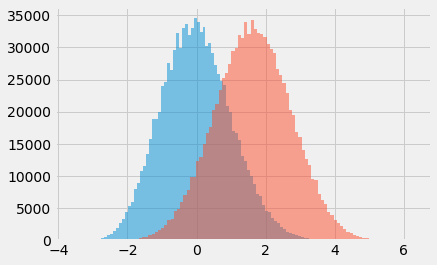

In [383]:
def get_n(p_t, p_c, t, conf, power):
    p = p_t * t + p_c * (1 - t)
    n = p * (1 - p) / (t * (1 - t)) * (norm.ppf([1 - (1 - conf) / 2, power]).sum() / (p_t - p_c)) ** 2
    return int(np.ceil(n))

def prop_ttest(p_t, p_c, n, t, conf, s=1_000_000):
    n_t = np.random.binomial(n, t, s)
    n_c = n - n_t
    x_t, x_c = np.random.binomial(n_t, p_t, s), np.random.binomial(n_c, p_c, s)
    p = (x_t + x_c) / (n_t + n_c)
    se = np.sqrt(p * (1 - p) * (1 / n_t + 1 / n_c))
    delta = (x_t / n_t - x_c / n_c)
    z = delta / se
    p_val = norm.sf(np.abs(z)) * 2
    alpha = 1 - conf
    df = pd.DataFrame({
        'n_t': n_t, 'x_t': x_t, 'n_c': n_c, 'x_c': x_c, 
        'p': p, 'se': se, 'z': z, 
        'p_val': p_val, 'sig': p_val < alpha, 'test': '='
    })
    df.loc[delta + se * norm.ppf(1 - alpha / 2) < 0, 'test'] = '<'
    df.loc[delta + se * norm.ppf(alpha / 2) > 0, 'test'] = '>'
    display(df.head(2))
    display(df.pivot_table('p_val', 'sig', 'test', 'count', 0))
    df['z'].hist(bins=100, alpha=0.5)
    return (p_val > alpha).sum(), (p_val < alpha).sum()

def run_tests(p_t, p_c, t, conf, power):
    n = get_n(p_t, p_c, t, conf, power)
    print(n)
    cm = np.array([
        prop_ttest(p_c, p_c, n, t, conf), 
        prop_ttest(p_t, p_c, n, t, conf)
    ])
    return cm

run_tests(p_t=0.5, p_c=0.3, t=0.05, conf=.9, power=.5)

In [149]:
def get_n(p_c, p_t, conf=0.9, power=0.8):
    p = (p_c + p_t) / 2
    n = 2 * p * (1 - p) / (p_t - p_c) ** 2 * norm.ppf([1 - (1 - conf) / 2, power]).sum() ** 2
    return int(np.ceil(n))


S = namedtuple('Sample', ['mu', 'std', 'n'])

def t_test(c: S, t: S):
    se = np.sqrt(t.std ** 2 / t.n + c.std ** 2 / c.n)
    z = (t.mu - c.mu) / se
    p_val = norm.sf(np.abs(z)) * 2
    return t.mu - c.mu, p_val





def run_tests(p_c, p_t, n, conf, s=100):
    x_c = np.random.binomial(n, p_c, s)
    x_t = np.random.binomial(n, p_t, s)
    p = (x_c + x_t) / 2 / n
    se = np.sqrt(p * (1 - p) * 2 / n)
    z = (p_t - p_c) / se
    p_val = norm.sf(z)
    return (p_val > (1 - conf) / 2).mean()

p_c, p_t = 0.1, 0.11
conf, power = 0.9, 0.8
n = get_n(p_c, p_t, conf, power)

run_tests(p_c, p_c, n, conf)

1.0

In [148]:
print(proportions_ztest([5, 12], [83, 99]))
p = (5 + 12) / (83 + 99)
se = np.sqrt(p * (1 - p) * (1 / 83 + 1 / 99))
z = (5 / 83 - 12 / 99) / se
print(z)
norm.sf(abs(z)) * 2

(-1.4078304151258787, 0.15918129181156992)
-1.4078304151258787


0.15918129181156992

In [104]:
def get_mde(p_c, n_c, n_t, conf, power):
    mde = 0
    for i in range(10):
        p = (p_c * n_c + (p_c + mde) * n_t) / (n_c + n_t)
        se = np.sqrt(p * (1 - p) * (1 / n_t + 1 / n_c))
        mde = se * norm.ppf([1 - (1 - conf) / 2, power]).sum()
    print(1 - (1 - conf) / 2)
    return mde




get_mde(0.01, 1000, 1000, 0.9, 0.8)

0.95


0.014472559290741123

In [0]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

In [11]:
def ztests(count, nobs):
    p_vals = []
    for c, n in zip(count, nobs):
        stat, p_val = proportions_ztest(c, n)
        p_vals.append(p_val)
    return p_vals

ztests([[5, 12], [5, 12]], [[83, 99], [83, 99]])

[0.15918129181156992, 0.15918129181156992]

0.16333333333333333
mean: -0.019991286550004317
std: 0.004452784847777237 0.004527508512784193
var: 1.982729290059455e-05


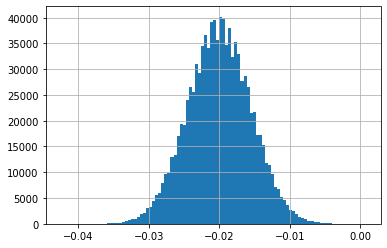

In [45]:
n_1 = 10000
n_2 = 20000
p_1 = 0.15
p_2 = 0.17
N = 1000000

p = (p_1 * n_1 + p_2 * n_2) / (n_1 + n_2)
print(p)
SE = np.sqrt(p * (1 - p) * (1 / n_1 + 1 / n_2))

df = pd.DataFrame({
    'n_1': n_1,
    'n_2': n_2,
    's_1': np.random.binomial(n_1, p_1, N),
    's_2': np.random.binomial(n_2, p_2, N),
    })
df['p_1'] = df['s_1'] / df['n_1']
df['p_2'] = df['s_2'] / df['n_2']
df['D'] = df['p_1'] - df['p_2']
print('mean:', df['D'].mean())
print('std:', df['D'].std(), SE)
print('var:', df['D'].var())
df['D'].hist(bins=100);

In [47]:
def generate_dataset(n_samples=100, uplift=0):
    x = np.random.uniform(low=0, high=1, size=n_samples*2)
    y = (
        + 10 * np.abs(x - 0.25)  
        + 2 * np.sin((x * 5) * 2 * np.pi)
        + np.random.normal(size=n_samples*2)
    )
    
    assignment = [1] * n_samples + [0] * n_samples
    np.random.shuffle(assignment)
    
    samples = pd.DataFrame({
        "x": x,
        "y": y,
        "group": assignment
    })
    
    samples.loc[lambda df: df.group == 1, "y"] += uplift
    
    return samples

ds = generate_dataset(n_samples=1000, uplift=1)
ds.head()

,x,y,group
0,0.113969,2.158366,1
1,0.739943,4.530411,1
2,0.273111,2.607211,1
3,0.608017,6.459661,1
4,0.831177,8.103104,1


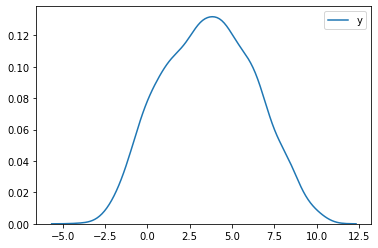

In [49]:
import seaborn as sns
sns.kdeplot(ds.y)

In [50]:
from scipy.stats import norm

sample_size = 1000
alpha = 0.05
z = norm.isf(alpha / 2)
estimated_variance = ds.y.var()

detectable_effect_size = z * np.sqrt(2 * estimated_variance / sample_size)
detectable_effect_size

0.23512092675202018